In [1]:
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K


from keras.models import load_model
from keras.preprocessing import image
import numpy as np
from os import listdir
from os.path import isfile, join

Using TensorFlow backend.


In [2]:
img_width = 150
img_height = 150

train_data_dir = 'D:/image_data/train'
validation_data_dir = 'D:/image_data/validation'
train_samples = 120
validation_samples = 30
epochs = 5
batch_size = 20

# Check for TensorFlow or Thieno
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [3]:
model = Sequential()
# Conv2D : Two dimenstional convulational model.
# 32 : Input for next layer
# (3,3) convulonational windows size
model.add(Conv2D(64, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) # Output convert into one dimension layer and will go to Dense layer
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [4]:
import keras
from keras import optimizers
model.compile(loss='binary_crossentropy', 
              optimizer=keras.optimizers.Adam(lr=.0001),
              metrics=['accuracy'])

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [6]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [7]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 24894 images belonging to 2 classes.


In [8]:
print(train_generator.class_indices)

{'Cat': 0, 'Dog': 1}


In [9]:
imgs, labels = next(train_generator)

In [10]:
from skimage import io

def imshow(image_RGB):
  io.imshow(image_RGB)
  io.show()

20
0.0


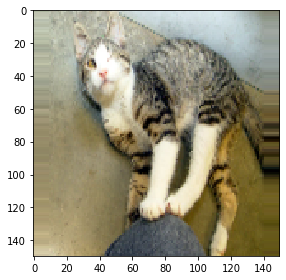

0.0


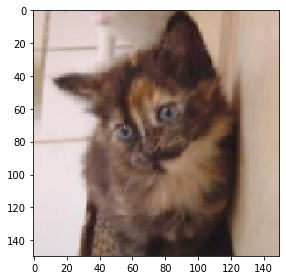

1.0


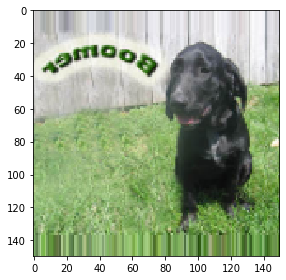

0.0


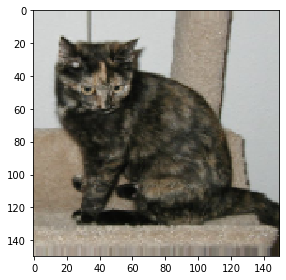

0.0


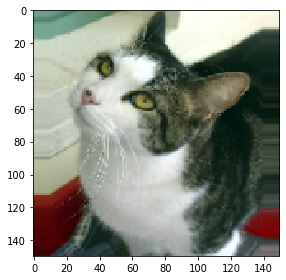

0.0


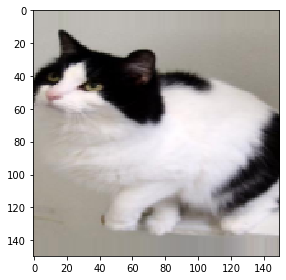

0.0


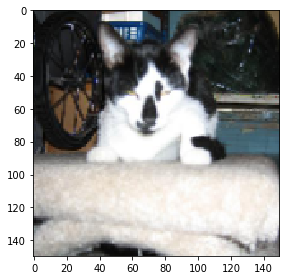

0.0


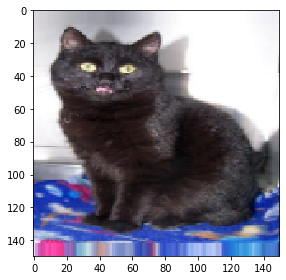

0.0


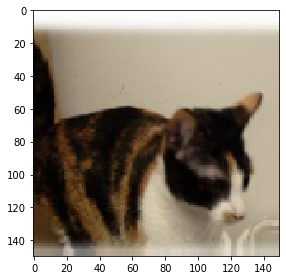

0.0


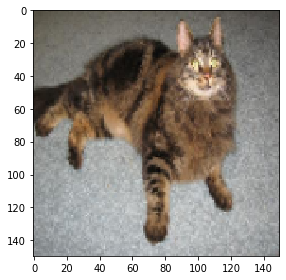

0.0


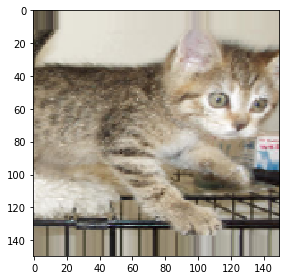

0.0


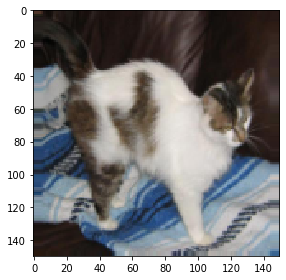

0.0


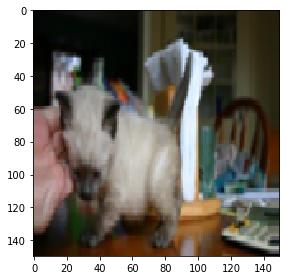

1.0


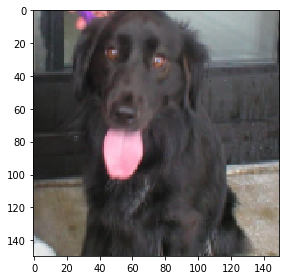

1.0


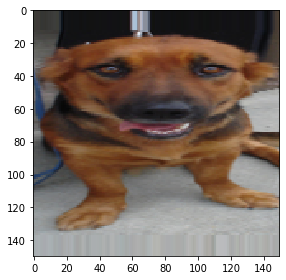

1.0


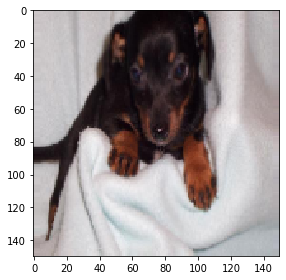

0.0


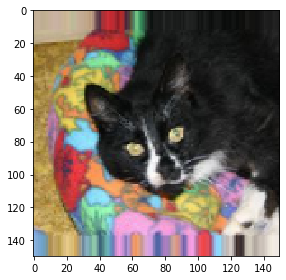

0.0


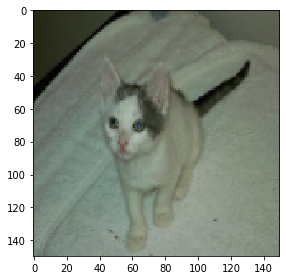

1.0


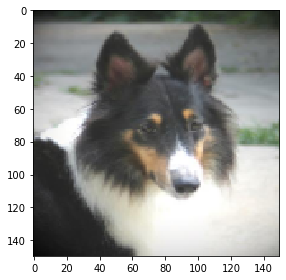

1.0


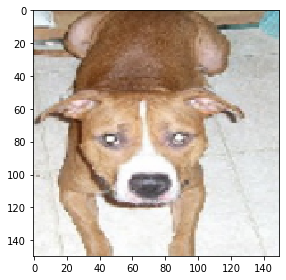

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
image_batch,label_batch = train_generator.next()

print(len(image_batch))
for i in range(0,len(image_batch)):
    image = image_batch[i]
    print(label_batch[i])
    imshow(image)

In [12]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 345 images belonging to 2 classes.


In [13]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_samples // batch_size)

Epoch 1/5
6/6 [==============================] - 7s 1s/step - loss: 0.6984 - accuracy: 0.5000 - val_loss: 0.6921 - val_accuracy: 0.5000
Epoch 2/5
6/6 [==============================] - 6s 985ms/step - loss: 0.6928 - accuracy: 0.5250 - val_loss: 0.6853 - val_accuracy: 0.6000
Epoch 3/5
6/6 [==============================] - 6s 998ms/step - loss: 0.6968 - accuracy: 0.4750 - val_loss: 0.6988 - val_accuracy: 0.3500
Epoch 4/5
6/6 [==============================] - 6s 931ms/step - loss: 0.6963 - accuracy: 0.4833 - val_loss: 0.6964 - val_accuracy: 0.4000
Epoch 5/5
6/6 [==============================] - 6s 991ms/step - loss: 0.6987 - accuracy: 0.4417 - val_loss: 0.6926 - val_accuracy: 0.5000


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


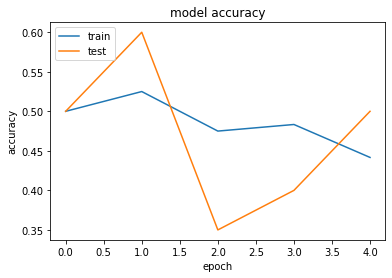

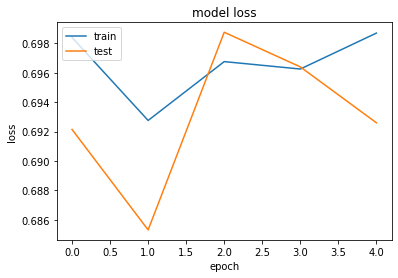

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [15]:
## Now Predict
predict_dir_path='D:/image_data/test/'
onlyfiles = [f for f in listdir(predict_dir_path) if isfile(join(predict_dir_path, f))]
print(onlyfiles)

['458.jpg', '459.jpg', '460.jpg', '461.jpg', '462.jpg', '463.jpg', '464.jpg', '465.jpg', '466.jpg', '467.jpg', '470.jpg', '471.jpg', '472.jpg', '473.jpg', '474.jpg', '475.jpg', '476.jpg', '477.jpg', '478.jpg', '479.jpg', '482.jpg', '483.jpg', '484.jpg', '485.jpg', '486.jpg', '487.jpg', '488.jpg', '489.jpg', '490.jpg', '491.jpg', '494.jpg', '495.jpg', '496.jpg', '497.jpg', '498.jpg', '499.jpg', '500.jpg', '501.jpg', '502.jpg', '503.jpg', '506.jpg', '507.jpg', '508.jpg', '509.jpg', '510.jpg', '511.jpg', '512.jpg', '513.jpg', '514.jpg', '515.jpg', '544.jpg', '545.jpg', '546.jpg', '547.jpg', '548.jpg', '549.jpg', '550.jpg', '551.jpg', '556.jpg', '557.jpg', '558.jpg', '559.jpg', '560.jpg', '561.jpg', '562.jpg', '563.jpg', '568.jpg', '569.jpg', '570.jpg', '571.jpg', '572.jpg', '573.jpg', '574.jpg', '575.jpg', '580.jpg', '581.jpg', '582.jpg', '583.jpg', '584.jpg', '585.jpg', '586.jpg', '587.jpg', '592.jpg', '593.jpg', '594.jpg', '595.jpg', '596.jpg', '597.jpg', '598.jpg', '599.jpg', '604.jpg'

In [21]:
from keras.preprocessing import image
dog_counter = 0 
cat_counter  = 0
for file in onlyfiles:
    img = image.load_img(predict_dir_path+file, target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = model.predict_classes(images, batch_size=10)
    classes = classes[0][0]
    
    if classes == 0:
        print(file + ": " + 'cat')
        cat_counter += 1
    else:
        print(file + ": " + 'dog')
        dog_counter += 1
print("Total Dogs :",dog_counter)
print("Total Cats :",cat_counter)

458.jpg: cat
459.jpg: dog
460.jpg: dog
461.jpg: dog
462.jpg: dog
463.jpg: dog
464.jpg: dog
465.jpg: dog
466.jpg: cat
467.jpg: cat
470.jpg: cat
471.jpg: cat
472.jpg: cat
473.jpg: cat
474.jpg: dog
475.jpg: dog
476.jpg: dog
477.jpg: dog
478.jpg: cat
479.jpg: dog
482.jpg: dog
483.jpg: dog
484.jpg: cat
485.jpg: cat
486.jpg: cat
487.jpg: dog
488.jpg: cat
489.jpg: cat
490.jpg: cat
491.jpg: dog
494.jpg: dog
495.jpg: cat
496.jpg: cat
497.jpg: cat
498.jpg: dog
499.jpg: dog
500.jpg: cat
501.jpg: cat
502.jpg: dog
503.jpg: dog
506.jpg: dog
507.jpg: dog
508.jpg: dog
509.jpg: cat
510.jpg: cat
511.jpg: cat
512.jpg: cat
513.jpg: dog
514.jpg: dog
515.jpg: dog
544.jpg: dog
545.jpg: cat
546.jpg: cat
547.jpg: dog
548.jpg: dog
549.jpg: dog
550.jpg: dog
551.jpg: cat
556.jpg: dog
557.jpg: cat
558.jpg: dog
559.jpg: dog
560.jpg: cat
561.jpg: dog
562.jpg: dog
563.jpg: dog
568.jpg: dog
569.jpg: dog
570.jpg: dog
571.jpg: cat
572.jpg: dog
573.jpg: cat
574.jpg: cat
575.jpg: dog
580.jpg: dog
581.jpg: cat
582.jpg: cat